<a href="https://colab.research.google.com/github/vicentemf/Machine-Learn-e-a-estimativa-de-consumo-de-uma-cervejaria/blob/main/Estimativa_do_consumo_de_cerveja_atrav%C3%A9s_da_regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#O objetivo deste artigo é estudar bibliotecas voltadas para machine learn e retirar insights para outros códigos. 
#Neste caso irei fazer uma regressão linear para estimar o consumo de cerveja de uma cervejaria local através de séries históricas .


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Vizualição geral de como o DataFrame ficou organizado
dados=pd.read_csv("Consumo_cerveja.csv",sep=";")
dados.head(5)


,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [ ]:
#Dimensão do nosso DataFrame
dados.shape

(365, 7)

In [ ]:
#Parâmetros estatísticos gerais
round(dados.describe(),2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


#Para iniciar a análise precisamos saber como os dados se comunicam. A correlação é um parâmentro estatístico que vai de -1(não correlacionado) até +1(perfeitamente correlacionado). Tratando-se de consumo de cerveja logo pensamos que as variáveis fim de semana e temperatura vão impactar diretamente no consumo.Abaixo podemos ver se isso é verdade :


In [ ]:
dados.corr().round(3)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.000,0.863,0.923,0.024,-0.051,0.575
temp_min,0.863,1.000,0.673,0.099,-0.060,0.393
temp_max,0.923,0.673,1.000,-0.049,-0.040,0.643
chuva,0.024,0.099,-0.049,1.000,0.002,-0.194
fds,-0.051,-0.060,-0.040,0.002,1.000,0.506
consumo,0.575,0.393,0.643,-0.194,0.506,1.000


Text(0.5, 0, 'dias')

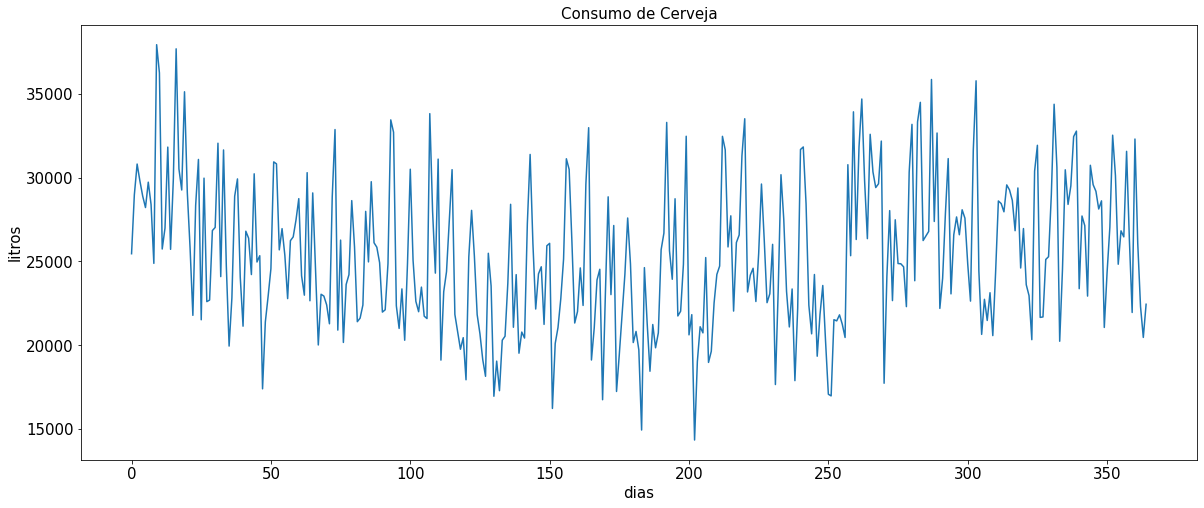

In [ ]:
#comandos para melhor visualização gráfica
ax = plt.subplots(figsize=(20,8))
ax=dados["consumo"].plot(fontsize=15)
ax.set_title("Consumo de Cerveja",fontsize=15)
ax.set_ylabel("litros",fontsize=15)
ax.set_xlabel("dias",fontsize=15)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Litros')

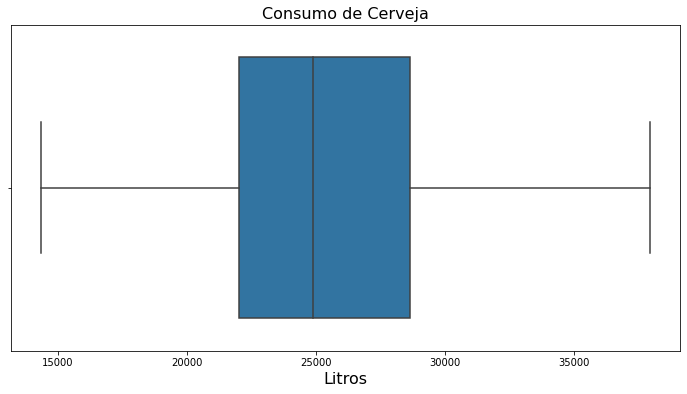

In [ ]:
#Através do "boxplot" conseguimos ver a concentração do consumo de cerveja 
ax=sns.boxplot(dados['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title("Consumo de Cerveja",fontsize=16)
ax.set_xlabel("Litros",fontsize=16)

#Com a correlação(como se era de esperar) percebemos estatisticamente que o dia ser um final de semana ou não impactava diretamente na quantidade de cerveja consumida. Neste boxplot podemos visualizar melhor a dimensão deste imapcto .

Text(0, 0.5, 'Consumo')

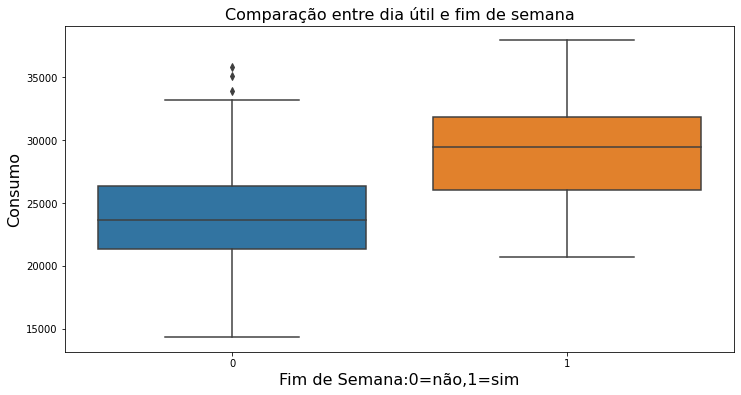

In [ ]:

bx=sns.boxplot(data=dados,y="consumo",x="fds")
bx.figure.set_size_inches(12,6)
bx.set_title("Comparação entre dia útil e fim de semana",fontsize=16)
bx.set_xlabel("Fim de Semana:0=não,1=sim",fontsize=16)
bx.set_ylabel("Consumo",fontsize=16)

In [ ]:
#Podemos perceber também que o consumo de cerveja ocorre através de uma distribuicão normal(curva de sino)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Consumo de cerveja(litros')

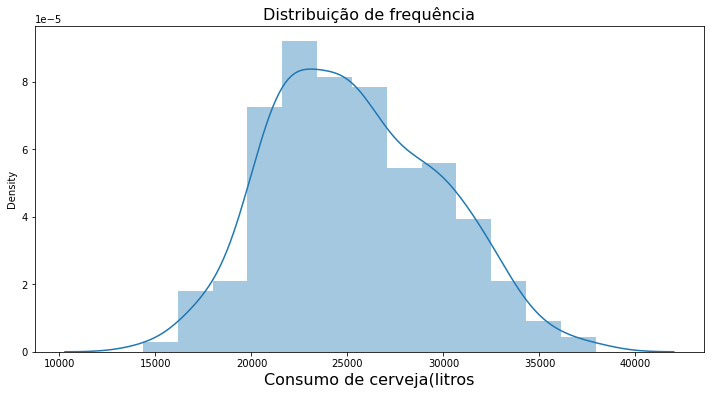

In [ ]:
ax=sns.distplot(dados["consumo"])
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de frequência",fontsize=16)
ax.set_xlabel("Consumo de cerveja(litros",fontsize=16)

Text(0.5, 1.2, 'Dispersão entre variáveis')

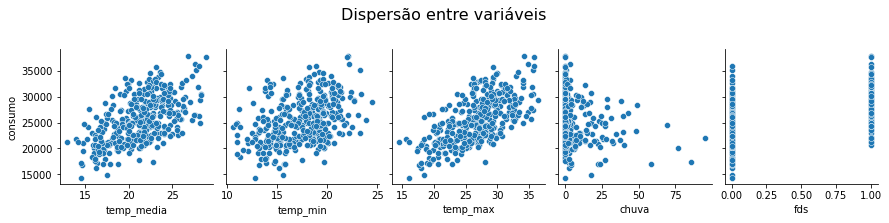

In [ ]:
ax=sns.pairplot(data=dados,y_vars='consumo',x_vars=["temp_media","temp_min","temp_max","chuva","fds"])
ax.fig.suptitle("Dispersão entre variáveis",fontsize=16,y=1.2)

#O comando "kind = reg" vai nos mostrar com funciona a inclinação da reta(ascendente ou descendente). Correlações positivas trarão retas ascendentes enquanto correlações negativas mostrarão retas descendentes . 
# Nos próximos códigos trago um pouco da visualização das retas que mostram uma melhor distruibuição além de algumas formas de traça-las através da linguaguem Python e suas bibliotecas .

Text(0.5, 1.2, 'Dispersão entre variáveis')

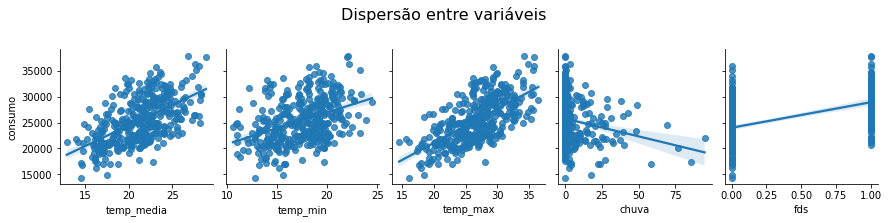

In [ ]:
ax=sns.pairplot(data=dados,y_vars='consumo',x_vars=["temp_media","temp_min","temp_max","chuva","fds"],kind="reg")
ax.fig.suptitle("Dispersão entre variáveis",fontsize=16,y=1.2)

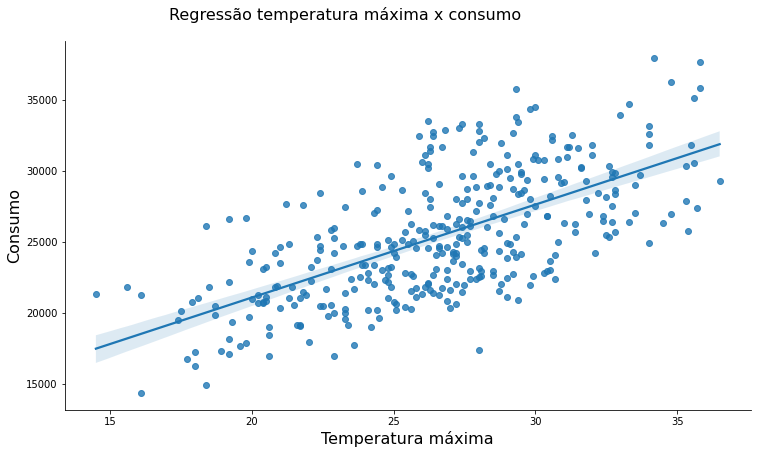

In [ ]:
ax=sns.lmplot(data=dados,x="temp_max",y="consumo")
ax.figure.set_size_inches(12,6)
ax.fig.suptitle("Regressão temperatura máxima x consumo",fontsize=16,y=1.05)
ax.set_xlabels("Temperatura máxima",fontsize=16)
ax.set_ylabels("Consumo",fontsize=16)

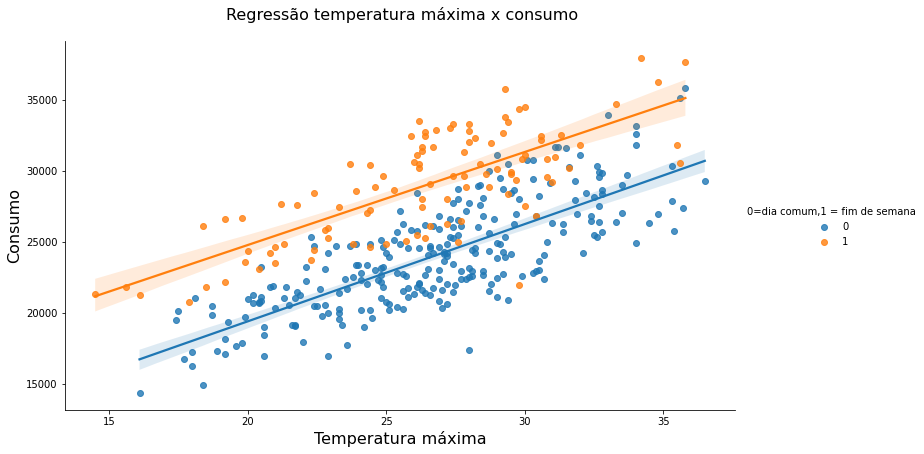

In [ ]:
ax=sns.lmplot(data=dados,x="temp_max",y="consumo",hue="fds",legend=False)
ax.figure.set_size_inches(12,6)
ax.fig.suptitle("Regressão temperatura máxima x consumo",fontsize=16,y=1.05)
ax.set_xlabels("Temperatura máxima",fontsize=16)
ax.set_ylabels("Consumo",fontsize=16)
ax.add_legend(title="0=dia comum,1 = fim de semana",fontsize=10)

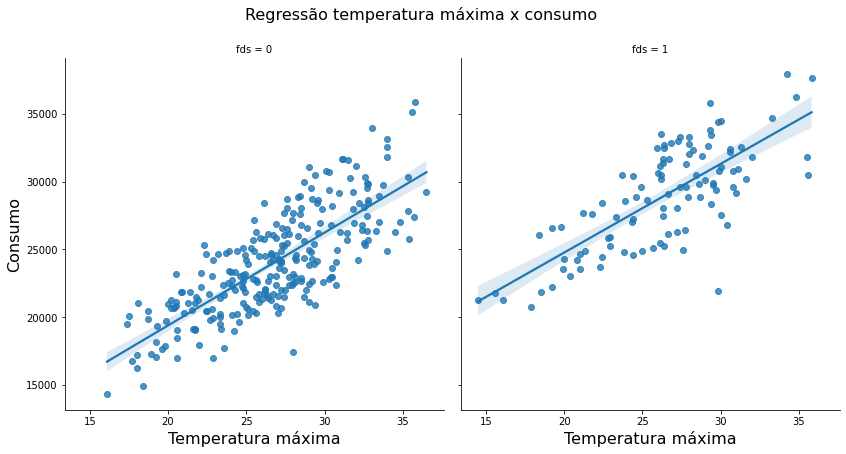

In [ ]:
ax=sns.lmplot(data=dados,x="temp_max",y="consumo",col="fds",legend=False)
ax.figure.set_size_inches(12,6)
ax.fig.suptitle("Regressão temperatura máxima x consumo",fontsize=16,y=1.05)
ax.set_xlabels("Temperatura máxima",fontsize=16)
ax.set_ylabels("Consumo",fontsize=16)


#De forma resumida, a biblioteca sklearn nos permitirá treinar alguns dados e depois testá-los. Meu objetivo aqui é estimar o consumo de cerveja futuro através dos dados que mais impactaram o consumo de cerveja no passado. No fim,trago um pequeno simulador para finalizar este artigo .

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Variável dependente
y=dados["consumo"]

In [ ]:
#Variáveis independentes
X=dados[["temp_max","chuva","fds"]]

In [ ]:
#é comum estimar 30 % ou 40% para testes e respectivamente 70% e 60% para treino .
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2811)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
modelo=LinearRegression()

In [ ]:
#modelo utilizando os dados de treino
modelo.fit(X_train,y_train) 

LinearRegression()

In [ ]:
 #coeficiente de correlação com os dados de treino,quanto maior,melhor
print(f"R²={modelo.score(X_train,y_train).round(2)}") 

R²=0.73


In [ ]:
#previsões para os dados de teste
y_previsto=modelo.predict(X_test) 


In [ ]:
#coeficiente de determinação para as previsões(teste) do modelo,quanto maior,melhor
print(f"R²={(metrics.r2_score(y_test,y_previsto).round(2))}") 

R²=0.69


#Aqui eu testo o código , o modelo.predict irá me dar uma previsão para a linha do Dataframe que eu escolher(bastar mudar o número em colchetes para escolher outra linha) .
# Em seguida crio um simulador para  poder estimar o consumo de cerveja através da "temperatura máxima","chuva" e "fds"(fim de semana) .

In [ ]:

entrada= X_test[0:1]
entrada


,temp_max,chuva,fds
5,30.5,12.2,0


In [ ]:
 modelo.predict(entrada)

array([26094.90177526])

In [ ]:
#criando um simulador
temp_max=37
chuva= 0
fds=1
entrada=[[temp_max,chuva,fds]]
print(f"Previsão de consumo de {(modelo.predict(entrada).round(4))} litros")

Previsão de consumo de [36688.3198] litros


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_previsto_train=modelo.predict(X_train)

Text(0.5, 1.0, 'Relação entre consumo real e sua previsão')

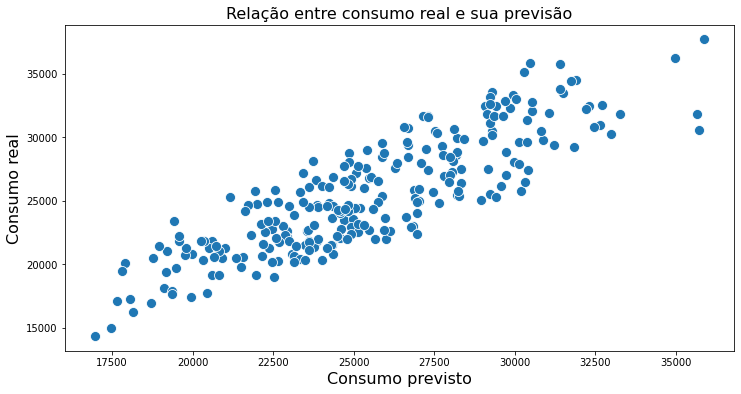

In [ ]:
#gráfico entre valor estimado e valor real
ax= sns.scatterplot(x=y_previsto_train,y=y_train,s=100)
ax.figure.set_size_inches(12,6)
ax.set_xlabel("Consumo previsto",fontsize=16)
ax.set_ylabel("Consumo real",fontsize=16)
ax.set_title("Relação entre consumo real e sua previsão",fontsize=16)


In [ ]:
#O residuo será o erro entre a estimativa do modelo e o consumo real .
residuo=y_train - y_previsto_train

Text(0.5, 1.0, 'Relação entre consumo real e sua previsão')

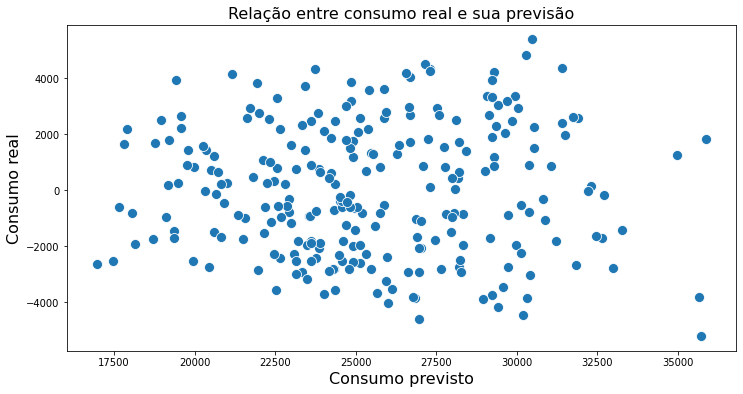

In [ ]:
#gráfico entre valor estimado e resíduo
ax= sns.scatterplot(x=y_previsto_train,y=residuo,s=100)
ax.figure.set_size_inches(12,6)
ax.set_xlabel("Consumo previsto",fontsize=16)
ax.set_ylabel("Consumo real",fontsize=16)
ax.set_title("Relação entre consumo real e sua previsão",fontsize=16)


#Podemos observar que temos poucos dados para fazer uma análise profunda,entretanto,considero este estudo válido para termos dimensão do poder do machine learn através da linguagem Python e suas bibliotecas e como fonte de insights para códigos mais complexos. 